In [6]:
import matplotlib.pyplot as plt
from skimage import io, filters, util, restoration, morphology, exposure
import os
import numpy as np

In [7]:
# DATA_DIR = r'D:\Researchdata\ZY1'
DATA_DIR = r'C:\Users\chen2\Documents\Research Project\ZY1'

In [8]:
for parent, dir, file in os.walk(DATA_DIR):
    if( 'tiff' in parent):
        for f in file:
            raw_stack = io.imread(os.path.join(parent, f))
            break

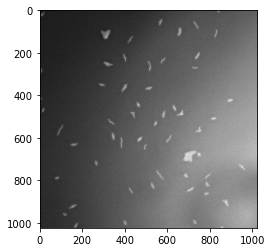

In [9]:
img_raw = raw_stack[2, ..., 2]
img_sharp = filters.unsharp_mask(img_raw, radius = 10, amount = 2, preserve_range = True)
# img_sharp = util.img_as_uint(img_sharp)
plt.imshow(img_sharp, cmap = 'gray')

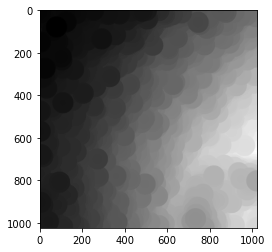

In [10]:
background = restoration.rolling_ball(img_sharp, radius = 50)
plt.imshow(background, cmap = 'gray')

C:\Users\chen2\anaconda3\envs\pilus\lib\site-packages\skimage\util\dtype.py:507: UserWarning: Downcasting int32 to int16 without scaling because max value 14334 fits in int16
  return _convert(image, np.int16, force_copy)
C:\Users\chen2\anaconda3\envs\pilus\lib\site-packages\IPython\core\interactiveshell.py:3361: UserWarning: Possible precision loss converting image of type int16 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


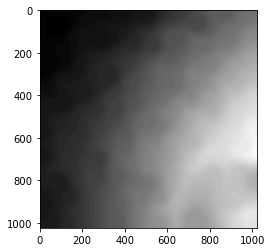

In [13]:
background_normal = util.img_as_int(filters.rank.mean(util.img_as_int(background.astype(int)), selem = morphology.disk(30)))
plt.imshow(background_normal, cmap = 'gray')

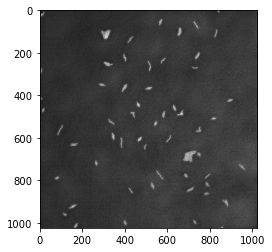

In [14]:
img_bg_reduced = img_sharp - background_normal
img_bg_reduced[img_sharp < background_normal] = 0
# img_bg_reduced[img_bg_reduced <0 ] = 0
# img_bg_reduced = exposure.rescale_intensity(img_bg_reduced, out_range = (np.min(img_sharp), np.max(img_sharp)))
# img_bg_reduced = (img_bg_reduced.astype(np.int16))
plt.imshow(img_bg_reduced, cmap = 'gray')
# plt.hist(img_bg_reduced.ravel(), bins=255)

In [18]:
thresholds = filters.threshold_multiotsu(img_bg_reduced, classes = 4)

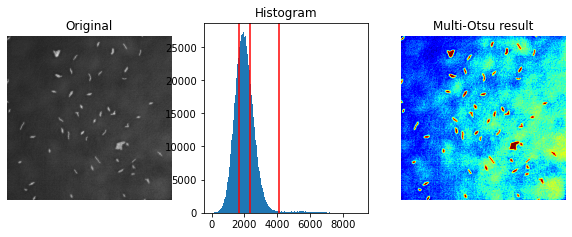

[1686.52842632 2361.13979685 4100.92701559]


In [20]:

# Using the threshold values, we generate the three regions.
regions = np.digitize(img_bg_reduced, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(img_bg_reduced, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(img_bg_reduced.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()
print(thresholds)
thresh = [thr for thr in thresholds if thr > 2400][0]

In [21]:
low = thresh * .8
high = thresh
lowt = (img_bg_reduced > low).astype(int)
hight = (img_bg_reduced > high).astype(int)
hyst = filters.apply_hysteresis_threshold(img_bg_reduced, low, high)
img_hyst = np.logical_or(hyst, hight)

In [22]:
res = morphology.white_tophat(img_hyst, morphology.disk(1))

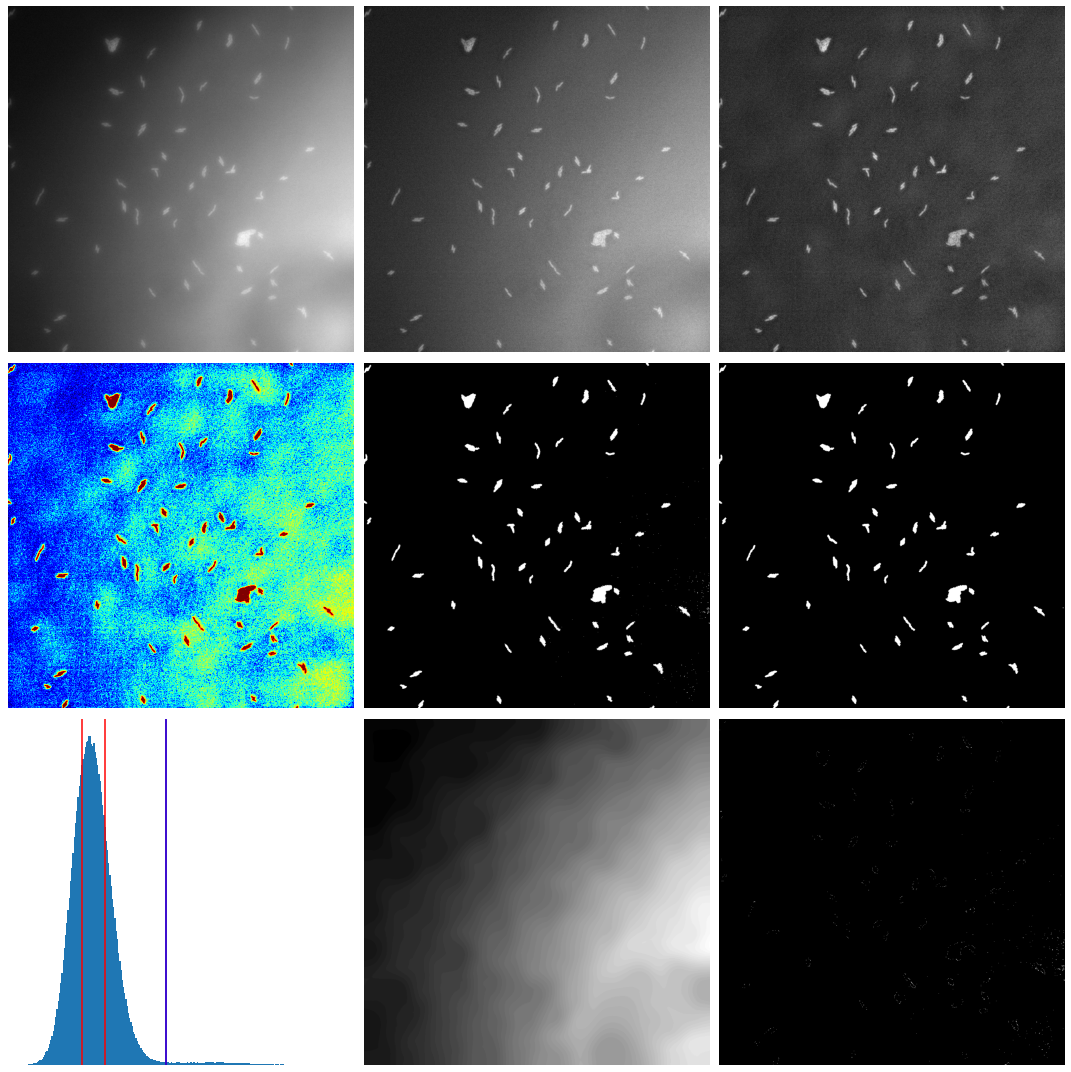

In [24]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))

ax[0, 0].imshow(img_raw, cmap = 'gray')
ax[0, 1].imshow(img_sharp, cmap = 'gray')
ax[0, 2].imshow(img_bg_reduced, cmap = 'gray')
ax[1, 0].imshow(regions, cmap = 'jet')
ax[1, 1].imshow(img_hyst, cmap = 'gray')
ax[1, 2].imshow(img_hyst - np.int0(res), cmap = 'gray')
ax[2, 0].hist(img_bg_reduced.ravel(), bins=256)
for thr in thresholds:
    ax[2, 0].axvline(thr, color='r')
ax[2, 0].axvline(thresh, color = 'b')
# ax[2, 0].axvline(thresh, color='r')
ax[2, 1].imshow(background_normal, cmap = 'gray')
ax[2, 2].imshow(res, cmap = 'gray')
for a in ax.ravel():
    a.axis('off')

plt.tight_layout()

plt.show()